In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [11]:
with open('betastars.txt') as f:
    betastars = np.array([[float(x) for x in line.split(',')] for line in f])

In [12]:
betastars = betastars.flatten()

In [13]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', label='lin')

In [14]:
def expcurve(parameters):
    """Plot an exponential curve"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = exp_model(x_vals, *parameters)
    plt.plot(x_vals, y_vals, '-', label='exp')

In [15]:
def exp_model(x, a, b,c):
    return a*np.exp(-b*x)+c

In [21]:
# Fit curves
x = np.array(list(range(4, 28)))
y = betastars
drop = 6 # Drop 

# Fit a line
reg = LinearRegression().fit(x.reshape(-1,1)[drop:], y[drop:])
params, _ = curve_fit(exp_model, x[drop:], y[drop:])

<ipython-input-15-01ee8ec6a18a>:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)+c


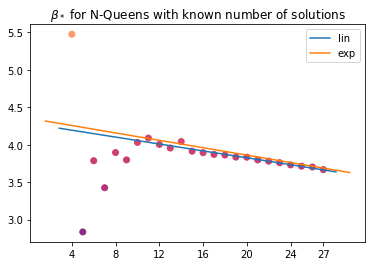

In [22]:
# Colours
colors = y
cmap = mpl.cm.magma
norm = mpl.colors.Normalize(vmin=0, vmax=7)

# Draw lines
fig, ax = plt.subplots()
plt.scatter(x,y,c=colors, cmap=cmap, norm=norm)
abline(reg.coef_[0], reg.intercept_)
expcurve(params)

# title, legend, axes, ticks
plt.title(r"$\beta_*$ for N-Queens with known number of solutions")
ax.set_xticks(np.append(x[::4],27))
plt.legend()
plt.show()

In [ ]:
print("Lin model (ax+b):\tb = {0:.2f}".format(reg.intercept_), "a= {0:.2f}".format(reg.coef_[0]))
print("(N=1000) predicted β*:\t {0:.3f}".format(reg.predict([[1000]])[0]), "\n")

print("Exp model a*exp(-bx)+c:\t", "a = {0:.2f}, b = {1:.2f}, c = {2:.2f}".format(*params))
print("(N=1000) predicted β*:\t {0:.3f}".format(exp_model(1000, *params)))

In [41]:
betastring = ",".join(str(x)[:5] for x in exp_model(np.arange(50, 1001, 50), *params)) 

In [42]:
# Write predicted betas for 50 to 1000 step 50
with open('fitbetastars.txt','w') as f:
     f.write(betastring)